## 1. Matplotlib
#### 1.1. Основные опции - виды графиков, цвета, линии, точки
##### 1.1.1 Импорты - шапка

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%pylab inline


import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams['axes.grid'] = True
mpl.rcParams['font.family'] = 'Ubuntu'
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
# чтобы был русский шрифт
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


Картинки - точки, линии в разных цветах

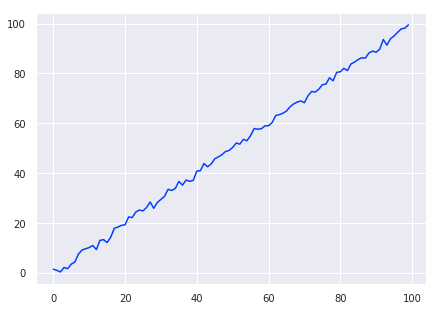

In [73]:
noise = np.random.normal(0,1,100)
data = range(100) + noise
plt.plot(data)

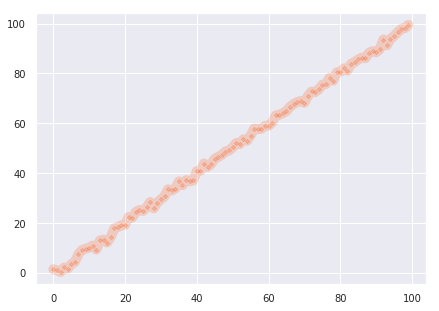

In [108]:
color_list = ['brown', 'y', '1', (1, 0.3, 0)]
alpha_list = [0.1, 0.7, 0.2]
marker_variants = ['H', 'D']
plt.plot(data, color = color_list[-1],
         alpha = alpha_list[-1],
         marker=marker_variants[-1],
         linestyle='-',
         linewidth=10,
         markersize=3)

Постройте полупрозрачные светло-фиолетовые точки c точками в виде звездочек, где линия в 5 раз больше по размеру, чем точки

In [ ]:
### Ваш код

#### 1.2 Несколько графиков
###### 1.2.1 Несколько графиков на одном 

Text(0.5,0,u'\u043a\u0440\u0430\u0441\u0438\u0432\u0430\u044f \u043e\u0441\u044c')

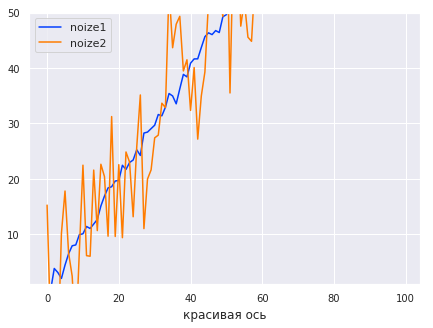

In [118]:
noise1 = np.random.normal(0,1,100)
noise2 = np.random.normal(0,10,100)
data1 = range(100) + noise1
data2 = range(100) + noise2
plt.plot(data1, label = 'noize1')
plt.plot(data2, label = 'noize2')
plt.legend(loc='upper left')
plt.ylim(1, 50)
plt.xlabel(u'красивая ось')

Нарисуйте 7 линий с шумом на одной картинке, с легендой по центру, в цветах радуги с ограничением -10 и 20 по y, подпишите по всем осям

In [119]:
### Твой код

###### 1.2.2 Несколько графиков последовательно

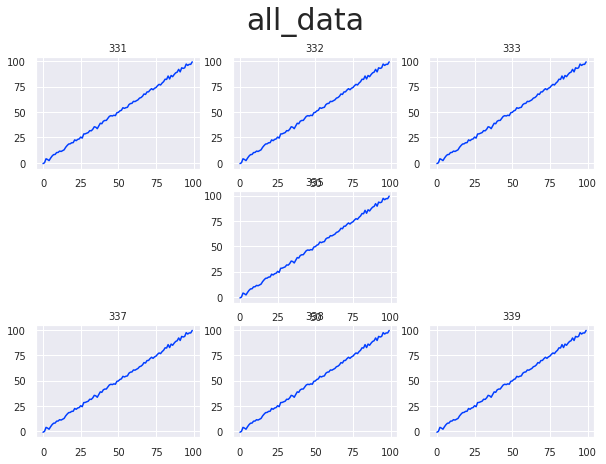

In [137]:
plt.rcParams['figure.figsize'] = 10, 7
for f in [331, 332, 333, 335, 337, 338, 339]:
    plt.subplot(f)
    plt.plot(data1)
    plt.title(f, fontsize = 10)
    plt.suptitle('all_data', fontsize = 30)

In [ ]:
#### Твой код - нарисуй первые и последние 3 картинки
### в сетке 4x3 с разным шумом и разными цветами и разной прозрачностью

## 2. Seaborn


#### 2.1 Датасеты + стандартные графики

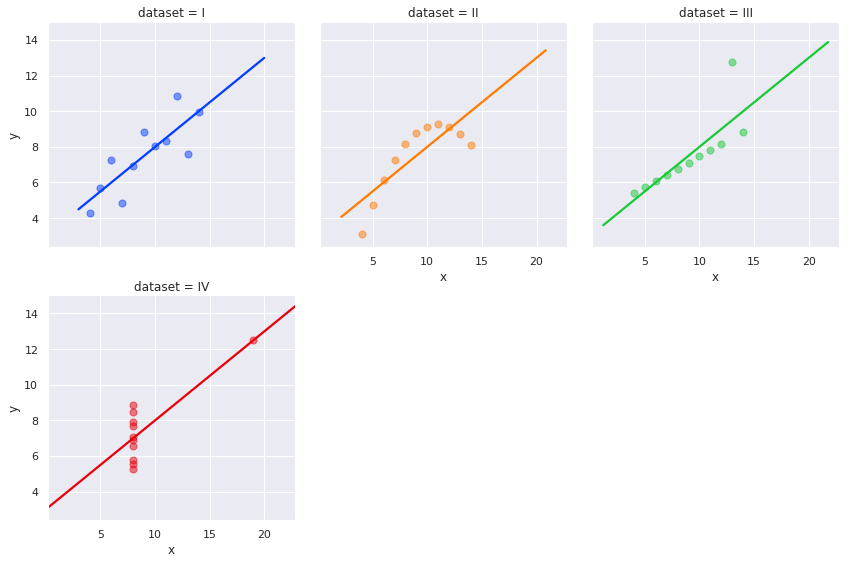

In [65]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set(style="ticks", palette="muted")
sns.set(style="darkgrid", palette="bright")


# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=3, ci=None,  height=4,
           scatter_kws={"s": 50, "alpha": 0.5})

##### Вариант попроще, без регрессии
Как тут включить разбиение по цветам в темной палитре?

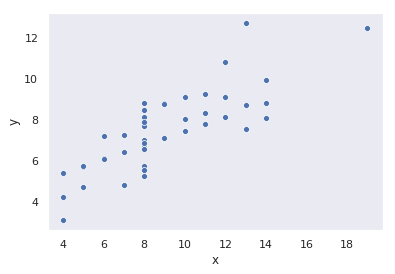

In [63]:

sns.scatterplot(x="x", y="y", data=df, ci=None)

In [ ]:
### Твой код

##### Стандартные палитры и стили
https://seaborn.pydata.org/tutorial/color_palettes.html

Стили - darkgrid, whitegrid, dark, white, and ticks.

Попробуйте разные стили и палитры, выберете ту, которая понравилась больше всего!

Поиграйтесь с параметрами, выясните какой за что отвечает

In [ ]:
### Твой код

### Гистограммы и KDE 

Что это и зачем

1) Ну во-первых это просто красиво :)

2) Хотим посмотреть возможные значения признаков в данных

3) Хотим постмотреть, как распределены признаки в данных относительно друг друга

#### Гистограммы

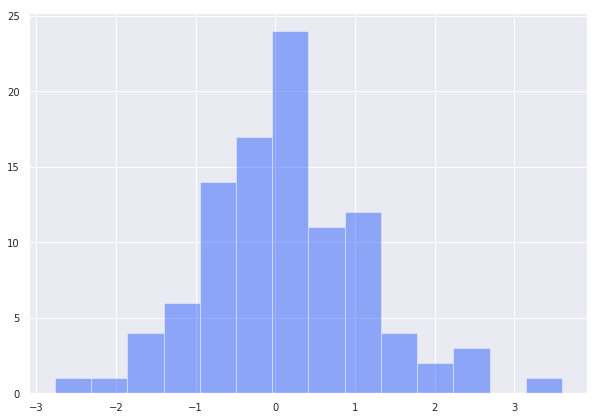

In [140]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False, rug=False)

##### KDE

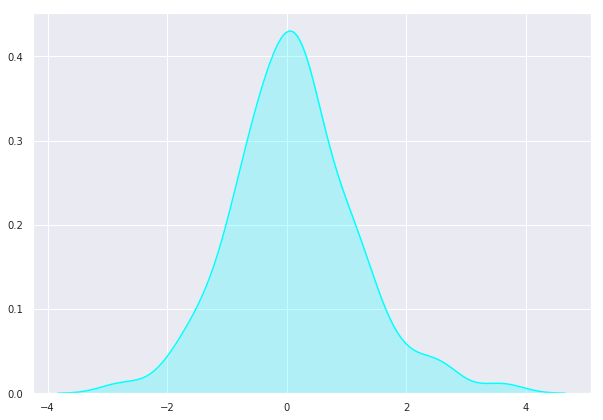

In [143]:
sns.kdeplot(x, shade=True, color = (0,1,1))

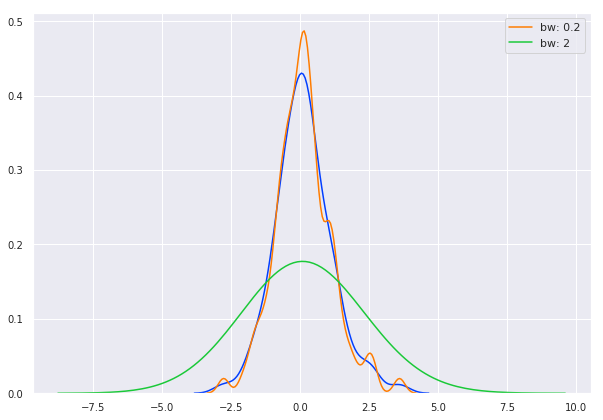

In [144]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

#### Можно смотреть, как признаки в датасете связаны между собой

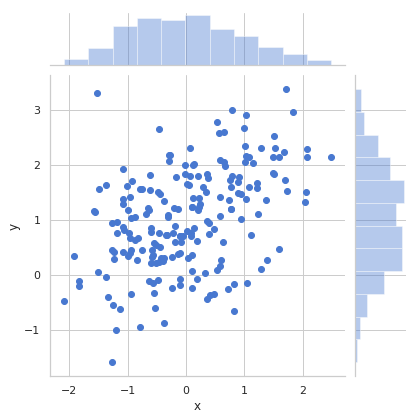

In [155]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

sns.jointplot(x="x", y="y", data=df)

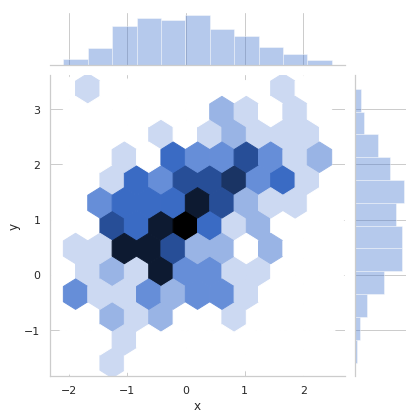

In [156]:
kind_vars = ['hex', 'kde']
sns.jointplot(x="x", y="y", data=df, kind = kind_vars[0])

Посмотрите взаимосвязь различных признаков для датасета ирис, сделайте выводы

In [ ]:
### Ваш код

##### Визуализируем распределение признаков, точки в пространстве и kde одновременно

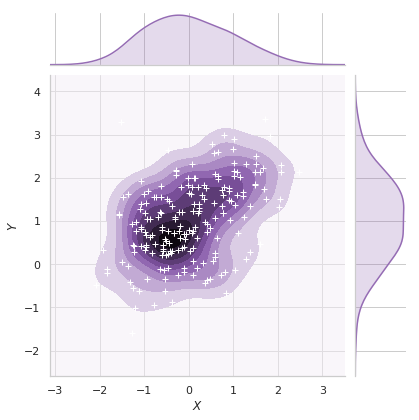

In [169]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.5)
g.set_axis_labels("$X$", "$Y$");

#### Самая главная функция 

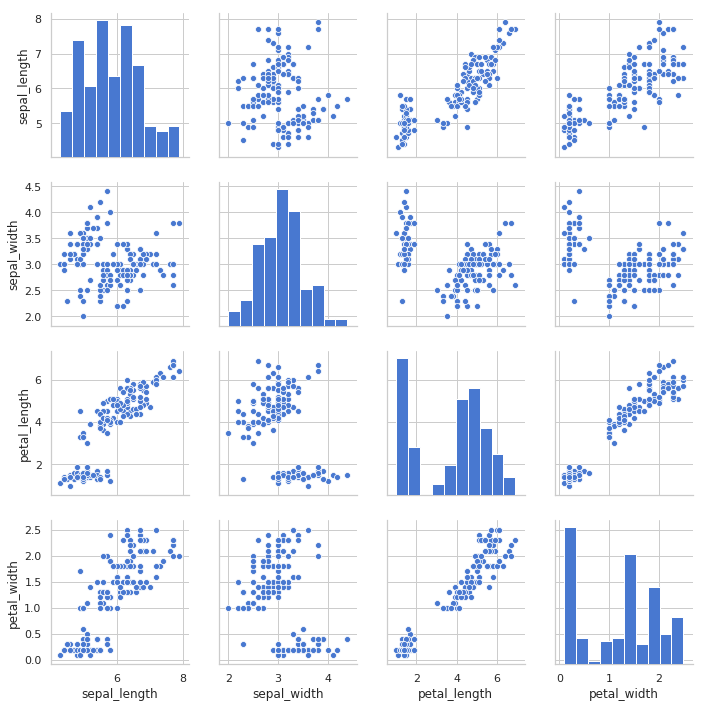

In [170]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

#### Рисуем кросс-kde

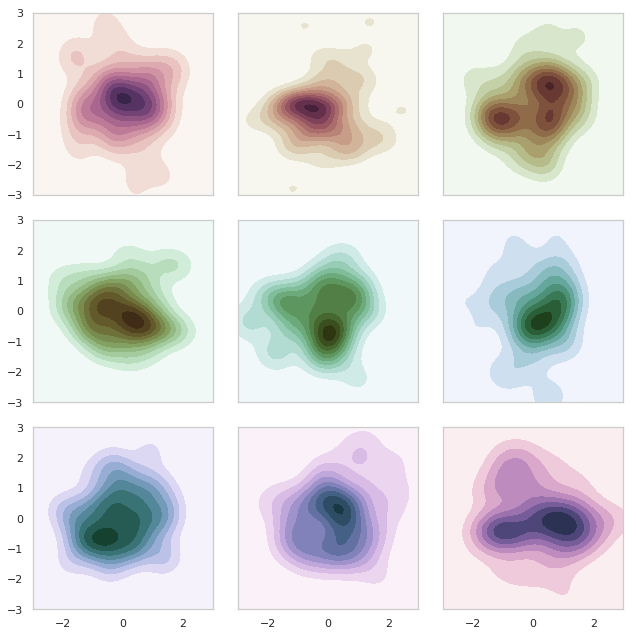

In [160]:
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

#### Swarmplot

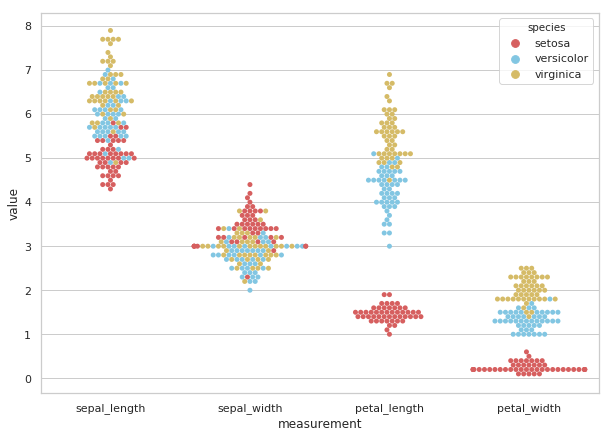

In [145]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris)

##### Графики с погрешностями

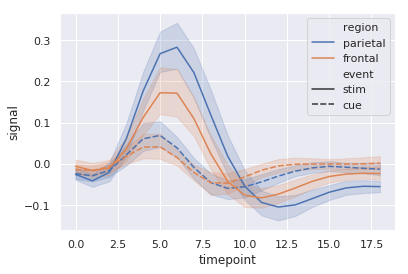

In [6]:
import seaborn as sns

sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)
plt.show()

##### Рисуем heatmap

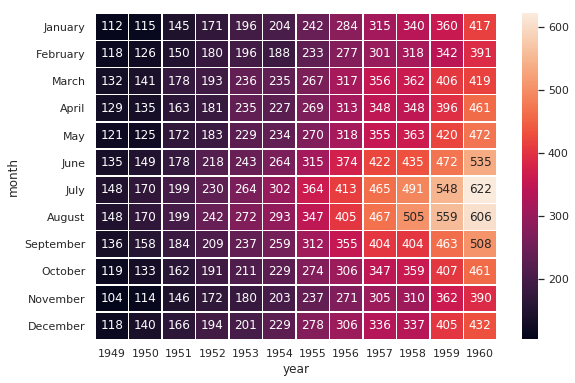

In [171]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

Какой вывод можно сделать из этого графика? Постройте heatmap по датасету с iris (категоризуйте переменные) 

In [174]:
### Ваш код

### Violineplot

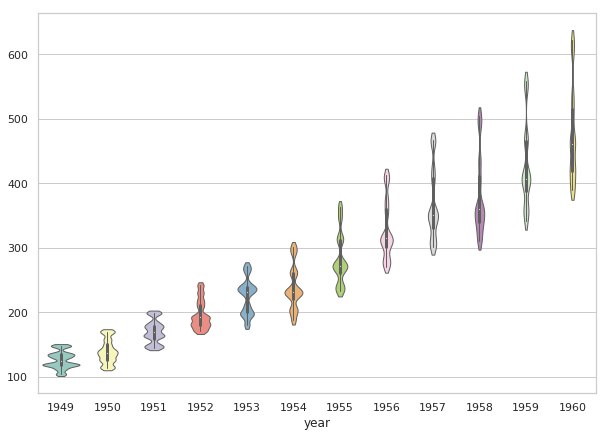

In [176]:
sns.violinplot(data=flights, palette="Set3", bw=.2, cut=1, linewidth=1)

## Задание
Скачай датасет по планетам. Сделай интересные визуализации и выводы из них на основе предыдущих примеров

In [181]:
your_dataset = sns.load_dataset('planets')

In [183]:
your_dataset.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
